In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from opti_graphs import *
import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np
plt.style.use('ggplot')

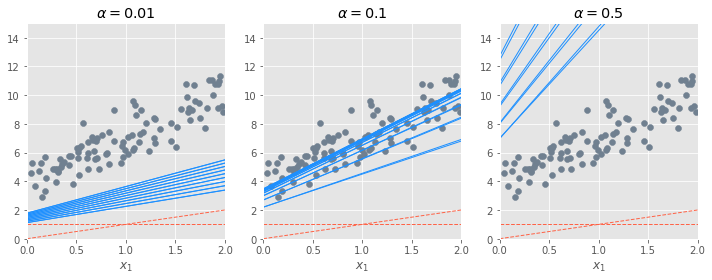

In [2]:
X, y = artificial_points()
plt.figure(figsize=(10, 4))
# compararemos el efecto del descenso de gradiente batch en tres niveles
for i, n in enumerate([0.01,0.1, 0.5]):
    plt.subplot(1, 3, i + 1)
    batch_gd_plot(X, y, theta=1, alpha=n)
    plt.tight_layout()


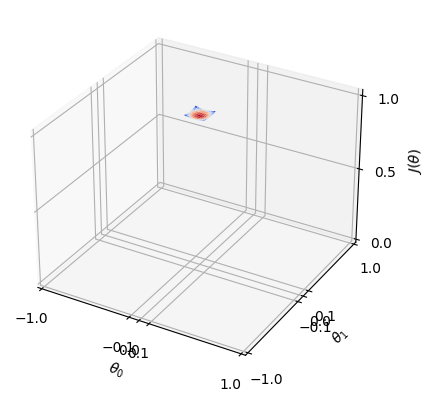

In [5]:
plt.style.use('default') 
global_surface()

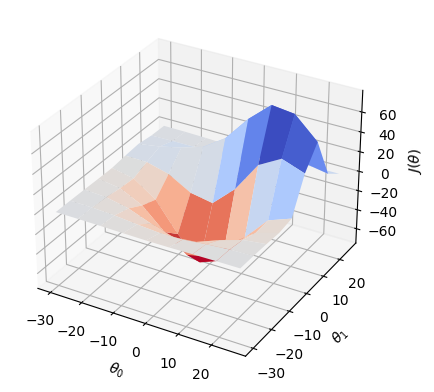

In [7]:
plt.style.use('default')
max_min_surface()

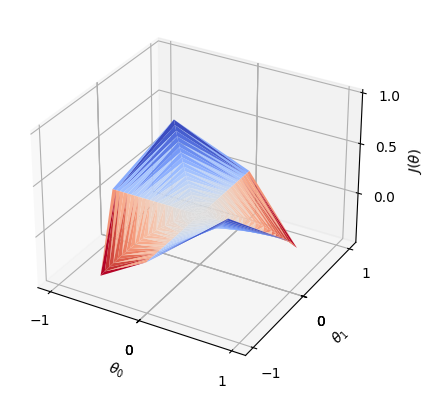

In [8]:
plt.style.use('default')
saddle_surface()

In [20]:
interactive(gradient_1d, alpha = (.01,6))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=6.0, min=0.01), Output()), _dom_classes=…

In [21]:
interactive(gradient_2d, alpha = (0.01, 3))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=0.01), Output()), _dom_classes=…

In [22]:
# generamos los imports básicos de Keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import LambdaCallback
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [23]:
# Realizamos un dataset con 500 muestras,
# 20 atributos y un vector objetivo con 2 clases
X, y = datasets.make_classification(n_samples = 500)
# generamos la división en conjuntos de entrenamiento/validación
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 15820)

In [24]:
sgd = SGD(lr = 0.01, # Tasa de aprendizaje
        momentum = 0, #Obviamos momento
        decay = 0, # obviamos decaimiento de los pesos
        nesterov = False) #Obviamos momento de nesterov

In [25]:
# generamos un objeto que nos permita acoplar capas
model = Sequential()
# agregamos una capa densa con 20 neuronas
model.add(Dense(20, input_dim = 20, # 20 atributos de entrada
                    activation = 'softmax')) # y una activación softmax
# compilamos el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer = sgd)

In [26]:
# vamos a preservar los parámetros
weights = []
# Preservaremos todos los parámetros al finalizar una época de entrenamiento
print_weights = LambdaCallback(on_epoch_end = lambda epoch, logs:weights.append(model.layers[0].get_weights()))
# entrenamos el modelo
# conjunto de entrenamiento
# definimos la cantidad de datos a ingresar
model.fit(X_train, y_train, batch_size = X_train.shape[0],
                            epochs=1000, # la cantidad de iteraciones de entrenamiento.
                            verbose=0, # no deseamos implementar un reporte insitu
                            validation_data=(X_test, y_test),
                            # incluimos nuestro callback
                            callbacks=[print_weights])
# extraemos los coeficientes
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

Text(0.5, 1.0, 'batch_size = Todo el conjunto de entrenamiento (Batch mode)')

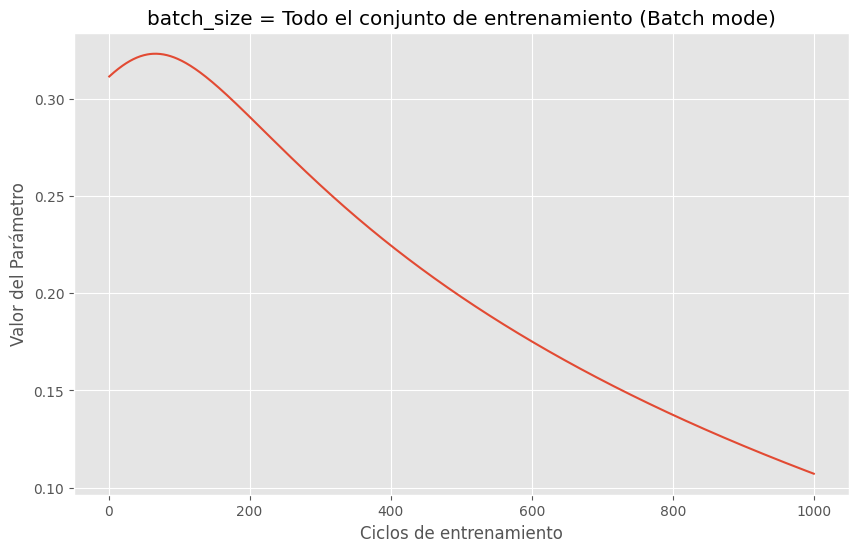

In [27]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('batch_size = Todo el conjunto de entrenamiento (Batch mode)')

In [28]:
weights = []
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs:
weights.append(model.layers[0].get_weights()))
model.fit(X_train, y_train, batch_size = 64, # fijamos la cantidad de datos en cada batch
                            epochs = 1000, #aumentamos la cantidad de ciclos de entrenamiento.
                            verbose = 0,
                            validation_data = (X_test, y_test), callbacks=[print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

Text(0.5, 1.0, 'Mini Batch')

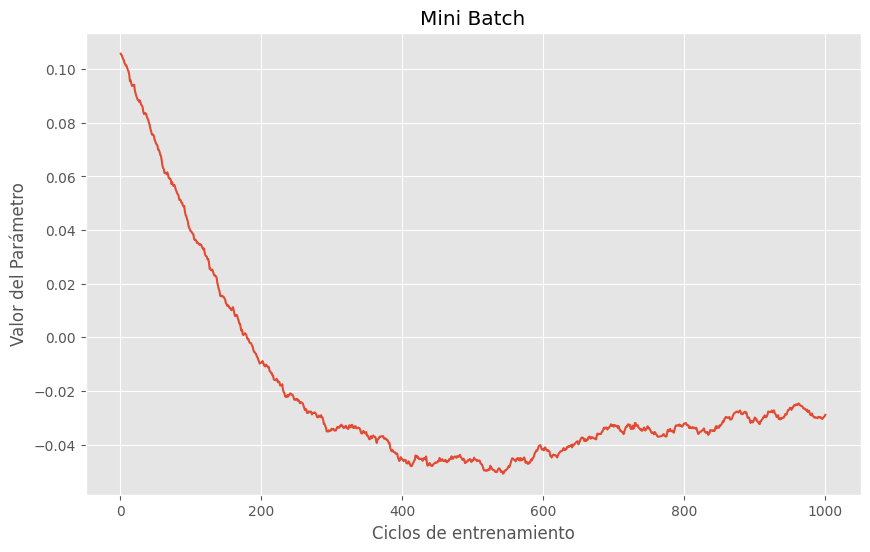

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('Mini Batch')

In [19]:
weights = []
print_weights = LambdaCallback(on_epoch_end = lambda epoch, logs:
weights.append(model.layers[0].get_weights()))
model.fit(X_train, y_train, batch_size = 1, # fijamos la cantidad de datos a entrenar.
                            epochs = 1000, # mantenemos la cantidad de épocas a entrenar en 1000.
                            verbose = 0,
                            validation_data = (X_test, y_test),
                            callbacks = [print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

Text(0.5, 1.0, 'SGD')

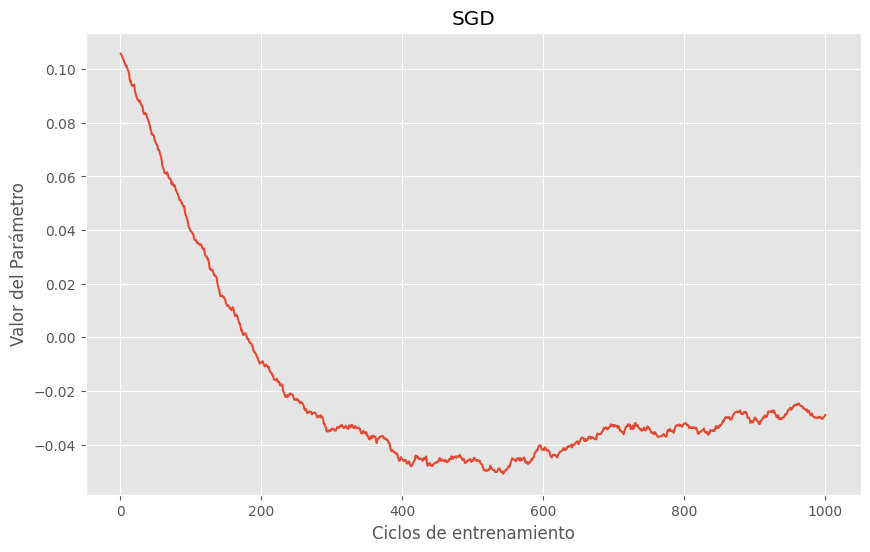

In [30]:
plt.figure(figsize = (10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('SGD')

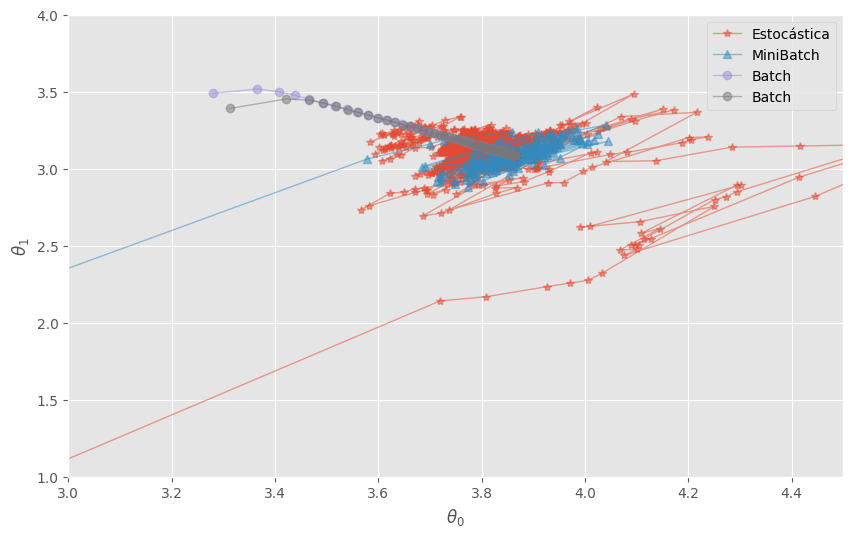

In [31]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 6))
X, y = artificial_points()
batch_gd = batch_gd_plot(X, y, theta = 1, alpha = .2, theta_path = True)
stochastic_gd = stochastic_gd_plot(X, y, theta_path = True)
minibatch_gd = mini_batch_gd_plot(X, y, theta = 1, alpha = .2, theta_path = True)
compare_gd_strategies(batch_gd, stochastic_gd, minibatch_gd)